<a href="https://colab.research.google.com/github/mahdiimanzadeh/Cataract-dataset-classification/blob/main/Cataract_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1L8Ue_gr0OKopSbTIljsJP9jvweV7Xzrl -O cataract.zip


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1L8Ue_gr0OKopSbTIljsJP9jvweV7Xzrl
From (redirected): https://drive.google.com/uc?id=1L8Ue_gr0OKopSbTIljsJP9jvweV7Xzrl&confirm=t&uuid=0a24dd03-f0ac-4233-b0c1-ee61171972bc
To: /content/cataract.zip
100% 227M/227M [00:05<00:00, 43.5MB/s]


In [ ]:
!unzip cataract.zip -d /content/dataset

In [3]:
!ls /content/dataset/train

Streaming output truncated to the last 5000 lines.
case5015_35_png_jpg.rf.8042661ae2226c71713d93097ea2f3f7.jpg
case5015_36_png_jpg.rf.b39be461dbfb6fb722f833d966f11e73.jpg
case5015_38_png_jpg.rf.f1599c4fcddcc1775350287f64f5e57a.jpg
case5015_41_png_jpg.rf.529e66745aff8f60eb774b087203f878.jpg
case5015_42_png_jpg.rf.a88e84de2cc93c247e652110911c44b3.jpg
case5015_43_png_jpg.rf.f1d595edc5f873ae61b26fe1486c7d40.jpg
case5015_46_png_jpg.rf.54b952c4abf73316f931180220b38e9d.jpg
case5015_47_png_jpg.rf.8cf53291262f7fb023f862e149b67331.jpg
case5015_49_png_jpg.rf.2e54453f9d6cdc411cc54f4acb8a55f3.jpg
case5015_50_png_jpg.rf.35ae2fb884f42148d45b46a2ef038705.jpg
case5015_52_png_jpg.rf.fe3e8f9ef8bef944af39ef661a13426f.jpg
case5015_53_png_jpg.rf.a4c6fd56b332e456f0bf658de9c95fc4.jpg
case5015_55_png_jpg.rf.239a47e42b8b52d81aebfee58327631e.jpg
case5015_56_png_jpg.rf.2d369f2115226e02407786cc1a8b097d.jpg
case5015_58_png_jpg.rf.fa9daff6e0a8b66aa05cbd176259e944.jpg
case5015_59_png_jpg.rf.7bd5c2548d4991f077c914a823

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# بارگذاری داده‌ها
train_df = pd.read_csv("/content/dataset/train/_classes.csv")
test_df = pd.read_csv("/content/dataset/test/_classes.csv")
valid_df = pd.read_csv("/content/dataset/valid/_classes.csv")

In [5]:
# بررسی اولیه تعداد نمونه‌ها در هر مجموعه
dataset_sizes = {
    "Train": len(train_df),
    "Test": len(test_df),
    "Validation": len(valid_df)
}

In [6]:
train_df.columns.tolist()

['filename',
 ' Cannula',
 ' Cap Cystotome',
 ' Cap Forceps',
 ' Cornea',
 ' Forceps',
 ' I-A Handpiece',
 ' Lens Injector',
 ' Phaco Handpiece',
 ' Primary Knife',
 ' Pupil',
 ' Second Instrument',
 ' Secondary Knife']

In [7]:
# حذف فاصله‌های اضافی از نام ستون‌ها
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()
valid_df.columns = valid_df.columns.str.strip()

In [8]:
train_df

,filename,Cannula,Cap Cystotome,Cap Forceps,Cornea,Forceps,I-A Handpiece,Lens Injector,Phaco Handpiece,Primary Knife,Pupil,Second Instrument,Secondary Knife
0,case5309_53_png_jpg.rf.021af57b2e0435b3b23a4cd...,0,0,0,1,0,0,0,0,0,1,1,0
1,Video25_frame010280_png_jpg.rf.018c2acef5bea8f...,1,0,0,0,0,0,0,0,0,0,0,0
2,case5016_28_png_jpg.rf.01adaf4cbb787eba0de4e24...,0,0,0,1,0,0,0,1,0,1,1,0
3,case5013_41_png_jpg.rf.01fc7428c424e1cad98dfa2...,0,0,0,1,0,1,0,0,0,1,1,0
4,Video23_frame010920_png_jpg.rf.01fb8f8102a3518...,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,Video1_frame004680_png_jpg.rf.8304e0ac591e13dd...,0,0,0,1,0,0,0,1,0,1,1,0
5132,case5015_64_png_jpg.rf.82aaa72ba1bd1c58c99fd98...,0,0,0,1,0,1,0,0,0,1,0,0
5133,Video13_frame001700_png_jpg.rf.8319ef33a6b5e4c...,0,1,0,1,0,0,0,0,0,1,0,0
5134,Video4_frame003740_png_jpg.rf.8292dded06c33ba2...,0,0,0,1,0,0,0,1,0,1,1,0


In [9]:
class_columns = [col for col in train_df.columns if col != 'filename']
class_columns

['Cannula',
 'Cap Cystotome',
 'Cap Forceps',
 'Cornea',
 'Forceps',
 'I-A Handpiece',
 'Lens Injector',
 'Phaco Handpiece',
 'Primary Knife',
 'Pupil',
 'Second Instrument',
 'Secondary Knife']

In [10]:
# محاسبه تعداد برچسب‌های فعال در هر نمونه
train_label_counts = train_df[class_columns].sum(axis=1)
test_label_counts = test_df[class_columns].sum(axis=1)
valid_label_counts = valid_df[class_columns].sum(axis=1)

In [11]:
# محاسبه توزیع کلاس‌ها در هر مجموعه
train_class_distribution = train_df[class_columns].sum().sort_values(ascending=False)
test_class_distribution = test_df[class_columns].sum().sort_values(ascending=False)
valid_class_distribution = valid_df[class_columns].sum().sort_values(ascending=False)

In [12]:
# نمایش آمار کلی
dataset_sizes, train_class_distribution, test_class_distribution, valid_class_distribution

({'Train': 5136, 'Test': 835, 'Validation': 991},
 Cornea               4997
 Pupil                4992
 Cannula              1457
 Second Instrument     951
 I-A Handpiece         914
 Phaco Handpiece       722
 Cap Cystotome         393
 Lens Injector         346
 Forceps               311
 Secondary Knife       245
 Primary Knife         239
 Cap Forceps           177
 dtype: int64,
 Cornea               828
 Pupil                827
 Cannula              226
 Second Instrument    149
 I-A Handpiece        105
 Phaco Handpiece      100
 Forceps               66
 Lens Injector         64
 Primary Knife         60
 Cap Cystotome         59
 Secondary Knife       47
 Cap Forceps           21
 dtype: int64,
 Cornea               976
 Pupil                975
 Second Instrument    244
 Cannula              237
 I-A Handpiece        213
 Phaco Handpiece      181
 Cap Cystotome         72
 Lens Injector         64
 Secondary Knife       39
 Primary Knife         37
 Forceps               3

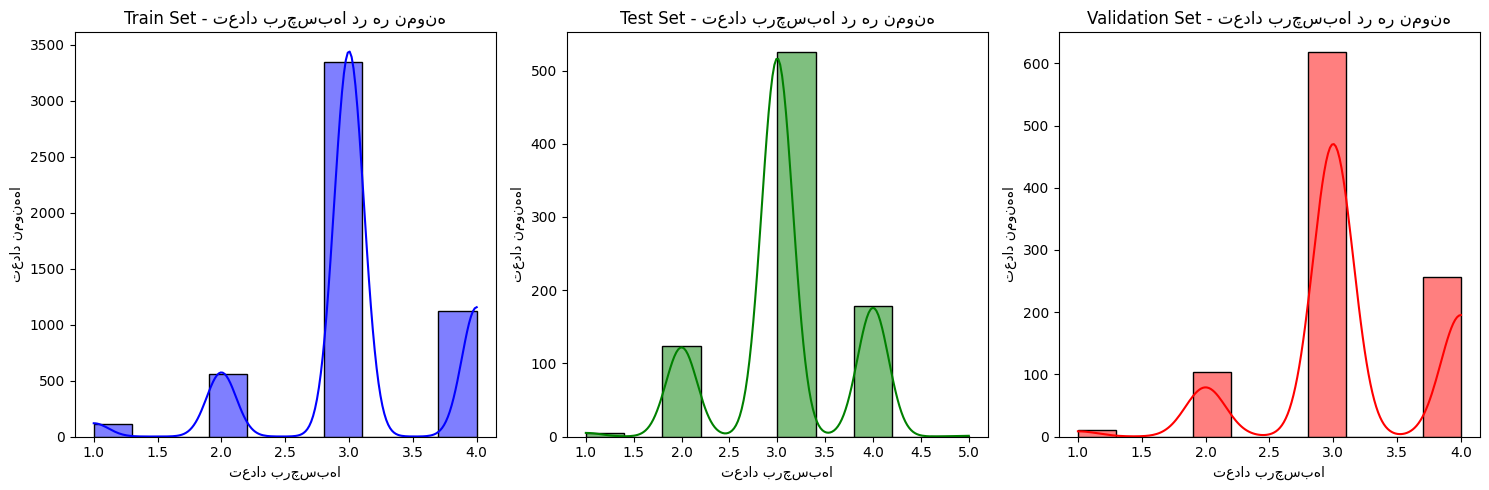

In [13]:
# رسم هیستوگرام تعداد برچسب‌ها در هر نمونه برای هر مجموعه داده
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_label_counts, bins=10, kde=True, color='blue')
plt.title("Train Set - تعداد برچسب‌ها در هر نمونه")
plt.xlabel("تعداد برچسب‌ها")
plt.ylabel("تعداد نمونه‌ها")

plt.subplot(1, 3, 2)
sns.histplot(test_label_counts, bins=10, kde=True, color='green')
plt.title("Test Set - تعداد برچسب‌ها در هر نمونه")
plt.xlabel("تعداد برچسب‌ها")
plt.ylabel("تعداد نمونه‌ها")

plt.subplot(1, 3, 3)
sns.histplot(valid_label_counts, bins=10, kde=True, color='red')
plt.title("Validation Set - تعداد برچسب‌ها در هر نمونه")
plt.xlabel("تعداد برچسب‌ها")
plt.ylabel("تعداد نمونه‌ها")

plt.tight_layout()
plt.show()

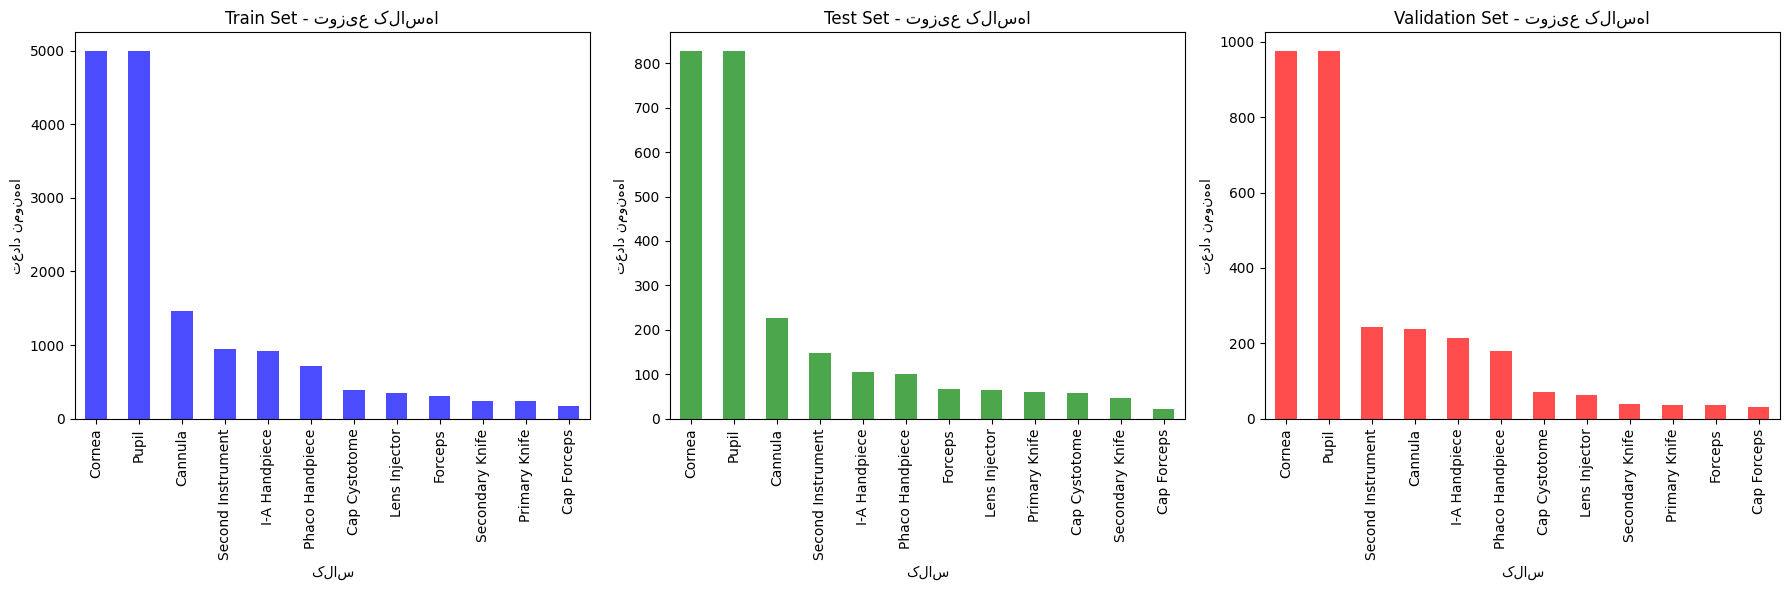

In [14]:
# رسم نمودار میله‌ای برای توزیع کلاس‌ها در هر مجموعه
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
train_class_distribution.plot(kind="bar", color="blue", alpha=0.7)
plt.title("Train Set - توزیع کلاس‌ها")
plt.xlabel("کلاس")
plt.ylabel("تعداد نمونه‌ها")
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
test_class_distribution.plot(kind="bar", color="green", alpha=0.7)
plt.title("Test Set - توزیع کلاس‌ها")
plt.xlabel("کلاس")
plt.ylabel("تعداد نمونه‌ها")
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
valid_class_distribution.plot(kind="bar", color="red", alpha=0.7)
plt.title("Validation Set - توزیع کلاس‌ها")
plt.xlabel("کلاس")
plt.ylabel("تعداد نمونه‌ها")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [15]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [16]:
# تنظیمات اولیه
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
DATASET_PATH = "/content/dataset"  # مسیر پوشه‌ی شامل train، test، valid

In [37]:
# استخراج نام کلاس‌ها
class_columns = [col for col in train_df.columns if col != 'filename']
num_classes = len(class_columns)

In [39]:
from sklearn.utils.class_weight import compute_class_weight

# محاسبه وزن کلاس‌ها
y = train_df[class_columns].values.flatten()
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [41]:
# پردازش تصاویر با ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# آماده‌سازی داده‌ها برای Stratified K-Fold
X = train_df['filename'].values
y = train_df[class_columns].values

# لیست برای ذخیره نتایج هر Fold
all_scores = []

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y.argmax(axis=1)))):
    print(f"Fold {fold + 1}/{K_FOLDS}")

    # تقسیم داده‌ها به Train و Validation
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # ایجاد ImageDataGenerator برای Train و Validation
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': X_train, **dict(zip(class_columns, y_train.T))}),
        directory=os.path.join(DATASET_PATH, 'train'),
        x_col='filename',
        y_col=class_columns,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='raw'
    )

    val_generator = test_datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': X_val, **dict(zip(class_columns, y_val.T))}),
        directory=os.path.join(DATASET_PATH, 'train'),
        x_col='filename',
        y_col=class_columns,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='raw'
    )

    # ایجاد مدل ResNet50
    base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model_resnet.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(base_model_resnet.output)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.02))(x)
    x = Dropout(0.6)(x)
    output_layer = Dense(num_classes, activation='sigmoid')(x)
    model_resnet = Model(inputs=base_model_resnet.input, outputs=output_layer)

    # ایجاد مدل EfficientNetB0
    base_model_eff = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model_eff.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(base_model_eff.output)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.02))(x)
    x = Dropout(0.6)(x)
    output_layer = Dense(num_classes, activation='sigmoid')(x)
    model_eff = Model(inputs=base_model_eff.input, outputs=output_layer)

    # کامپایل مدل‌ها
    model_resnet.compile(optimizer=Adam(learning_rate=0.0001),
                         loss=focal_loss(),
                         metrics=['accuracy'])

    model_eff.compile(optimizer=Adam(learning_rate=0.0001),
                      loss=focal_loss(),
                      metrics=['accuracy'])

    # آموزش مدل ResNet50
    print("Training ResNet50...")
    history_resnet = model_resnet.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        verbose=1,
        class_weight=class_weights_dict
    )

    # آموزش مدل EfficientNetB0
    print("Training EfficientNetB0...")
    history_eff = model_eff.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        verbose=1,
        class_weight=class_weights_dict
    )

    # پیش‌بینی با هر دو مدل
    y_pred_resnet = model_resnet.predict(val_generator)
    y_pred_eff = model_eff.predict(val_generator)

    # ترکیب پیش‌بینی‌ها با Weighted Averaging
    alpha = 0.6  # وزن ResNet50
    beta = 0.4   # وزن EfficientNetB0
    y_pred_ensemble = alpha * y_pred_resnet + beta * y_pred_eff
    y_pred_ensemble = (y_pred_ensemble > 0.5).astype(int)

    # ارزیابی مدل ترکیبی
    report = classification_report(y_val, y_pred_ensemble, target_names=class_columns, output_dict=True)
    all_scores.append(report)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 42)

In [35]:
from tensorflow.keras.applications import EfficientNetB0

In [36]:
# استفاده از EfficientNetB0 از پیش آموزش‌دیده‌شده
base_model_eff = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model_eff.layers:
    layer.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
# بارگذاری مدل ResNet50 از پیش آموزش‌دیده‌شده
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
from tensorflow.keras.regularizers import l2

# اضافه کردن لایه‌های سفارشی
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.02))(x)  # افزایش Regularization
x = Dropout(0.6)(x)  # افزایش Dropout
output_layer = Dense(num_classes, activation='sigmoid')(x)

In [22]:
# ایجاد مدل نهایی
model = Model(inputs=base_model.input, outputs=output_layer)

In [23]:
# استفاده از Focal Loss به جای Binary Crossentropy
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.keras.backend.clip(y_pred, epsilon, 1.0 - epsilon)
        cross_entropy = -y_true * tf.keras.backend.log(y_pred)
        weight = alpha * tf.keras.backend.pow((1 - y_pred), gamma)
        loss = weight * cross_entropy
        return tf.keras.backend.mean(loss)
    return focal_loss_fixed

In [24]:
# کامپایل مدل با تنظیمات جدید
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=focal_loss(),
              metrics=['accuracy'])

In [25]:
# آموزش مدل
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    verbose=1,
    class_weight=class_weights_dict
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 113s 582ms/step - accuracy: 0.1878 - loss: 13.0120 - val_accuracy: 0.2392 - val_loss: 5.6937
Epoch 2/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 79s 493ms/step - accuracy: 0.2086 - loss: 4.4161 - val_accuracy: 0.2392 - val_loss: 1.7540
Epoch 3/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 81s 488ms/step - accuracy: 0.2350 - loss: 1.3221 - val_accuracy: 0.6539 - val_loss: 0.4629
Epoch 4/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 81s 484ms/step - accuracy: 0.2567 - loss: 0.3378 - val_accuracy: 0.6539 - val_loss: 0.1026
Epoch 5/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 79s 489ms/step - accuracy: 0.3204 - loss: 0.0725 - val_accuracy: 0.6539 - val_loss: 0.0192
Epoch 6/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 82s 487ms/step - accuracy: 0.3614 - loss: 0.0133 - val_accuracy: 0.6539 - val_loss: 0.0033
Epoch 7/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 78s 487ms/step - accuracy: 0.3663 - loss: 0.0024 - val_accuracy: 0.6539 - val_loss: 7.3586e-04
Epoch 8/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 79s 486ms/step - accuracy: 0.3930 - l

In [26]:
# ارزیابی مدل
y_true = test_df[class_columns].values
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step


In [28]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

# نمایش متریک‌های ارزیابی
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_columns))

Classification Report:
                   precision    recall  f1-score   support

          Cannula       0.27      1.00      0.43       226
    Cap Cystotome       0.07      1.00      0.13        59
      Cap Forceps       0.03      1.00      0.05        21
           Cornea       0.99      1.00      1.00       828
          Forceps       0.08      1.00      0.15        66
    I-A Handpiece       0.13      1.00      0.22       105
    Lens Injector       0.08      1.00      0.14        64
  Phaco Handpiece       0.12      1.00      0.21       100
    Primary Knife       0.07      1.00      0.13        60
            Pupil       0.99      1.00      1.00       827
Second Instrument       0.18      1.00      0.30       149
  Secondary Knife       0.06      1.00      0.11        47

        micro avg       0.25      1.00      0.41      2552
        macro avg       0.25      1.00      0.32      2552
     weighted avg       0.70      1.00      0.73      2552
      samples avg       0.25   

In [29]:
# نمایش ماتریس درهم‌ریختگی
conf_matrices = multilabel_confusion_matrix(y_true, y_pred)
for i, matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for {class_columns[i]}:")
    print(matrix)

Confusion Matrix for Cannula:
[[  0 609]
 [  0 226]]
Confusion Matrix for Cap Cystotome:
[[  0 776]
 [  0  59]]
Confusion Matrix for Cap Forceps:
[[  0 814]
 [  0  21]]
Confusion Matrix for Cornea:
[[  0   7]
 [  0 828]]
Confusion Matrix for Forceps:
[[  0 769]
 [  0  66]]
Confusion Matrix for I-A Handpiece:
[[  0 730]
 [  0 105]]
Confusion Matrix for Lens Injector:
[[  0 771]
 [  0  64]]
Confusion Matrix for Phaco Handpiece:
[[  0 735]
 [  0 100]]
Confusion Matrix for Primary Knife:
[[  0 775]
 [  0  60]]
Confusion Matrix for Pupil:
[[  0   8]
 [  0 827]]
Confusion Matrix for Second Instrument:
[[  0 686]
 [  0 149]]
Confusion Matrix for Secondary Knife:
[[  0 788]
 [  0  47]]


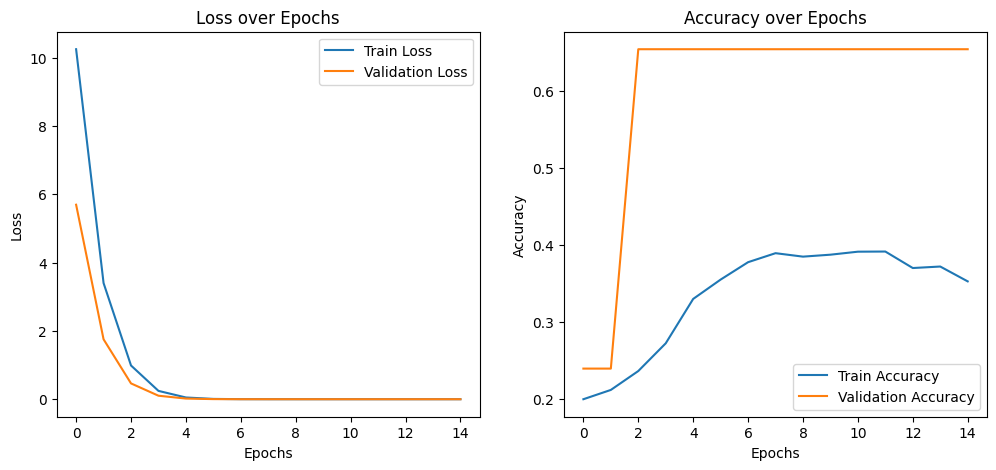

In [30]:
# رسم نمودارهای Loss و Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

In [31]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# تنظیمات Stratified K-Fold
K_FOLDS = 5
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

# لیست برای ذخیره نتایج هر Fold
all_scores = []

In [33]:
# آماده‌سازی داده‌ها برای Stratified K-Fold
X = train_df['filename'].values
y = train_df[class_columns].values

In [34]:
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y.argmax(axis=1))):
    print(f"Fold {fold + 1}/{K_FOLDS}")

    # تقسیم داده‌ها به Train و Validation
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # ایجاد ImageDataGenerator برای Train و Validation
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': X_train, **dict(zip(class_columns, y_train.T))}),
        directory=os.path.join(DATASET_PATH, 'train'),
        x_col='filename',
        y_col=class_columns,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='raw'
    )

    val_generator = test_datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': X_val, **dict(zip(class_columns, y_val.T))}),
        directory=os.path.join(DATASET_PATH, 'train'),
        x_col='filename',
        y_col=class_columns,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='raw'
    )

    # آموزش مدل
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        verbose=1,
        class_weight=class_weights_dict,
        callbacks=[EarlyStopping(monitor='val_loss', patience=3)]  # Early Stopping
    )

    # ارزیابی مدل روی Validation Set
    y_pred = model.predict(val_generator)
    y_pred = (y_pred > 0.5).astype(int)

    # محاسبه متریک‌ها
    report = classification_report(y_val, y_pred, target_names=class_columns, output_dict=True)
    all_scores.append(report)


Fold 1/5
Found 4108 validated image filenames.
Found 1028 validated image filenames.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 72s 558ms/step - accuracy: 0.3736 - loss: 8.2997e-05 - val_accuracy: 0.5924 - val_loss: 6.0886e-05
Epoch 2/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 64s 496ms/step - accuracy: 0.3481 - loss: 7.1975e-05 - val_accuracy: 0.5924 - val_loss: 5.4100e-05
Epoch 3/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 88s 544ms/step - accuracy: 0.3562 - loss: 6.4205e-05 - val_accuracy: 0.5924 - val_loss: 4.6862e-05
Epoch 4/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 75s 492ms/step - accuracy: 0.3729 - loss: 5.8121e-05 - val_accuracy: 0.5924 - val_loss: 4.1204e-05
Epoch 5/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 85s 515ms/step - accuracy: 0.3575 - loss: 5.0466e-05 - val_accuracy: 0.5924 - val_loss: 3.5992e-05
Epoch 6/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 79s 492ms/step - accuracy: 0.3594 - loss: 4.4771e-05 - val_accuracy: 0.5924 - val_loss: 3.1964e-05
Epoch 7/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 64s 495ms/step - accuracy: 0.3670 - loss: 3.8887e-05 - val_accuracy: 0.5924 - val_loss: 2.7042e-05
Epoch 8/15
129/129 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 75s 579ms/step - accuracy: 0.3628 - loss: 1.0877e-05 - val_accuracy: 0.5930 - val_loss: 6.1973e-06
Epoch 2/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 72s 500ms/step - accuracy: 0.3547 - loss: 9.4578e-06 - val_accuracy: 0.5930 - val_loss: 4.9808e-06
Epoch 3/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 64s 495ms/step - accuracy: 0.3452 - loss: 8.0896e-06 - val_accuracy: 0.5930 - val_loss: 4.1187e-06
Epoch 4/15
 55/129 ━━━━━━━━━━━━━━━━━━━━ 33s 456ms/step - accuracy: 0.3357 - loss: 6.4908e-06

KeyboardInterrupt: 

In [ ]:
# محاسبه میانگین نتایج
mean_precision = np.mean([score['weighted avg']['precision'] for score in all_scores])
mean_recall = np.mean([score['weighted avg']['recall'] for score in all_scores])
mean_f1 = np.mean([score['weighted avg']['f1-score'] for score in all_scores])

print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1}")